#importing Dataset



In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
import os

root_dir = "/content/gdrive/MyDrive/Colab Notebooks/2-1 패턴인식"

# Checking if our specified directory exists
os.path.exists(root_dir)

True

In [ ]:
import pandas as pd

In [ ]:
# Paths to the downloaded files
data_path = os.path.join(root_dir, "train.csv")

# Load data
df_train = pd.read_csv(data_path)


In [ ]:
data_path = os.path.join(root_dir, "train.csv")

df_train_ini = pd.read_csv(data_path)

##import library

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.decomposition import FactorAnalysis
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split, StratifiedKFold
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import matthews_corrcoef
from sklearn.preprocessing import LabelEncoder

#y 빼고 중복값 확인 후 yes 남기기

In [ ]:
df_train_ini.duplicated().sum()

0

In [ ]:
df_train.drop_duplicates(inplace=True)

In [ ]:
columns_without_ynid = [col for col in df_train.columns if ((col != 'y') and (col!= 'id'))]
columns_without_ynid

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [ ]:
df_train[columns_without_ynid].duplicated(keep=False).sum()

2504

In [ ]:
train_duplicated = df_train.loc[df_train[columns_without_ynid].duplicated(keep=False), :]

In [ ]:
train_duplicated['y'].value_counts()

y
no     2290
yes     214
Name: count, dtype: int64

In [ ]:
idx = train_duplicated[train_duplicated['y']=='no']['id']

idx = idx.to_list()
type(idx) #list
type(idx[0]) #int

int

In [ ]:
df_train = df_train[~df_train['id'].isin(idx)]
df_train

,id,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,12224,46,admin.,married,high.school,unknown,no,no,telephone,jul,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
1,36387,32,admin.,married,university.degree,no,yes,yes,cellular,jun,...,1,999,0,nonexistent,-2.9,92.963,-40.8,1.262,5076.2,yes
2,22703,36,technician,single,university.degree,no,no,no,cellular,aug,...,5,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,no
3,32742,30,services,single,high.school,no,yes,yes,cellular,may,...,1,999,2,failure,-1.8,92.893,-46.2,1.299,5099.1,no
4,40547,76,retired,divorced,basic.4y,no,no,no,cellular,aug,...,1,999,1,failure,-1.7,94.027,-38.3,0.886,4991.6,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,24109,37,admin.,married,university.degree,no,yes,no,telephone,nov,...,1,6,1,success,-0.1,93.200,-42.0,4.286,5195.8,no
32946,14149,56,unknown,single,basic.9y,no,no,yes,cellular,jul,...,5,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
32947,12379,55,admin.,married,high.school,no,yes,no,cellular,jul,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,no
32948,10138,34,services,married,high.school,no,no,no,telephone,jun,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.958,5228.1,no


Eliminate variables that are not utilized as inputs or that contain numerous missing values.

Impute the missing values:
* Continuous variables: mean value
* Categorical variables: most frequent value

 => 근데 없어서 안채워넣었음

In [ ]:
# Encode the Categorical Variables.

df_train["month"] = df_train["month"].replace({"jul": 7, "jun": 6, "aug": 8, "may": 5, "oct" : 10, 'sep': 9, "nov": 11, "apr": 4, "mar":3, "dec": 12})

df_train["year"] = df_train["cons.price.idx"]
df_train["year"] = df_train["cons.price.idx"].replace({93.918 : 2008, 92.963 : 2009, 93.444 : 2008, 92.893 : 2009,
                                                       94.027 : 2010, 92.431 : 2009, 94.199 : 2010, 94.465 : 2008,
                                                       92.649 : 2009, 93.994 : 2008, 93.075 : 2009, 93.2 : 2008,
                                                       94.601 : 2010, 92.469 : 2009, 92.201 : 2009, 93.369 : 2010,
                                                       93.876 : 2010, 92.713 : 2009, 93.798 : 2008, 92.843 : 2009,
                                                       92.379 : 2009, 94.055 : 2010, 94.215 : 2010, 93.749 : 2010,
                                                       94.767 : 2010, 92.756 : 2008})

In [ ]:
df_train['job'].replace('unknown', df_train['job'].mode().iloc[0], inplace=True)

In [ ]:
df_train['loan'].replace('unknown', df_train['loan'].mode().iloc[0], inplace=True)

In [ ]:
df_train['marital'].replace('unknown', df_train['marital'].mode().iloc[0], inplace=True)

In [ ]:
conti_var_new =df_train.describe().columns

In [ ]:
df_train = df_train.drop(labels=["euribor3m", "nr.employed"], axis=1)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30660 entries, 0 to 32949
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              30660 non-null  int64  
 1   age             30660 non-null  int64  
 2   job             30660 non-null  object 
 3   marital         30660 non-null  object 
 4   education       30660 non-null  object 
 5   default         30660 non-null  object 
 6   housing         30660 non-null  object 
 7   loan            30660 non-null  object 
 8   contact         30660 non-null  object 
 9   month           30660 non-null  int64  
 10  day_of_week     30660 non-null  object 
 11  campaign        30660 non-null  int64  
 12  pdays           30660 non-null  int64  
 13  previous        30660 non-null  int64  
 14  poutcome        30660 non-null  object 
 15  emp.var.rate    30660 non-null  float64
 16  cons.price.idx  30660 non-null  float64
 17  cons.conf.idx   30660 non-null  floa

#make Dummy variables

In [ ]:
columns = df_train.select_dtypes(include=[object]).columns
df = pd.concat([df_train, pd.get_dummies(df_train[columns])], axis=1)
df = df.drop(['job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week','poutcome', 'y'], axis =1)
print("\n","Describe Dataset_v2","\n")
print(df.info(),"\n \n \n")


 Describe Dataset_v2 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 65 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             32950 non-null  int64  
 1   age                            32950 non-null  int64  
 2   campaign                       32950 non-null  int64  
 3   pdays                          32950 non-null  int64  
 4   previous                       32950 non-null  int64  
 5   emp.var.rate                   32950 non-null  float64
 6   cons.price.idx                 32950 non-null  float64
 7   cons.conf.idx                  32950 non-null  float64
 8   euribor3m                      32950 non-null  float64
 9   nr.employed                    32950 non-null  float64
 10  job_admin.                     32950 non-null  bool   
 11  job_blue-collar                32950 non-null  bool   
 12  job_entrepreneur      

#Scaling, Train-Test Split, Downsampling

* Split data into train and test sets ([model_selection.train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html))

In [ ]:
min_max_scaler=preprocessing.MinMaxScaler()
data_scaled=pd.DataFrame(min_max_scaler.fit_transform(df),columns=df.columns)

In [ ]:
y = data_scaled.y_yes
data_scaled = data_scaled.drop(['y_yes','y_no'], axis = 1)

In [ ]:
from imblearn.over_sampling import ADASYN
X_resampled, y_resampled = ADASYN(random_state=42).fit_resample(data_scaled, y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, shuffle=True, test_size=0.2, random_state=42)

In [ ]:
'''from imblearn.under_sampling import OneSidedSelection
random_state = 42

X_samp, y_samp = OneSidedSelection(random_state=random_state,
                                   n_neighbors = 1, n_seeds_S = 1).fit_resample(X_train, y_train)

# Training & Validation

Models
* Random forest
* Decision Tree
* Gradient Boosting

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import KFold, cross_val_score

##CatBoost

In [ ]:
!pip install catboost
from catboost import CatBoostClassifier, Pool, cv
from sklearn.metrics import f1_score
from sklearn.model_selection import StratifiedKFold

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 5.1 MB/s eta 0:00:00


In [ ]:
# CatBoost 모델 정의
model = CatBoostClassifier()

#model training
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# F1 점수 계산
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

Learning rate set to 0.053448
0:	learn: 0.6568234	total: 210ms	remaining: 3m 29s
1:	learn: 0.6274080	total: 336ms	remaining: 2m 47s
2:	learn: 0.6117989	total: 454ms	remaining: 2m 31s
3:	learn: 0.5885304	total: 608ms	remaining: 2m 31s
4:	learn: 0.5572376	total: 718ms	remaining: 2m 22s
5:	learn: 0.5437777	total: 790ms	remaining: 2m 10s
6:	learn: 0.5327722	total: 864ms	remaining: 2m 2s
7:	learn: 0.5223555	total: 932ms	remaining: 1m 55s
8:	learn: 0.5163353	total: 1.01s	remaining: 1m 51s
9:	learn: 0.5092392	total: 1.08s	remaining: 1m 47s
10:	learn: 0.5000464	total: 1.16s	remaining: 1m 44s
11:	learn: 0.4922427	total: 1.24s	remaining: 1m 41s
12:	learn: 0.4876333	total: 1.3s	remaining: 1m 38s
13:	learn: 0.4781545	total: 1.37s	remaining: 1m 36s
14:	learn: 0.4655481	total: 1.44s	remaining: 1m 34s
15:	learn: 0.4587351	total: 1.51s	remaining: 1m 32s
16:	learn: 0.4430536	total: 1.59s	remaining: 1m 31s
17:	learn: 0.4388822	total: 1.66s	remaining: 1m 30s
18:	learn: 0.4345315	total: 1.73s	remaining: 1

###Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

y_prob = model.predict_proba(X_test)
print("Estimated probs:", y_prob[:10])

y_cls = model.predict(X_test)
print("Estimated classes:", y_cls[:10])
print()

Estimated probs: [[9.59024187e-01 4.09758133e-02]
 [3.48874948e-02 9.65112505e-01]
 [6.98164308e-06 9.99993018e-01]
 [5.17228872e-04 9.99482771e-01]
 [1.97709866e-01 8.02290134e-01]
 [2.41654745e-01 7.58345255e-01]
 [1.38520561e-02 9.86147944e-01]
 [9.06226126e-01 9.37738739e-02]
 [9.40518740e-01 5.94812604e-02]
 [8.69407034e-01 1.30592966e-01]]
Estimated classes: [0. 1. 1. 1. 1. 1. 1. 0. 0. 0.]



In [ ]:
print("Accuracy:", accuracy_score(y_test, y_cls))
print("F1:", f1_score(y_test, y_cls))
print("ROC AUC:", roc_auc_score(y_test, y_prob[:, 1]))

Accuracy: 0.9405840033855268
F1: 0.9394305435720448
ROC AUC: 0.9776435018131755


In [ ]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_cls)
conf_matrix_df = pd.DataFrame(
    conf_matrix,
    columns=["Predicted yes", "Predicted no"],
    index=["Actual yes", "Actual no"]
)
print(conf_matrix_df)

            Predicted yes  Predicted no
Actual yes           5669           180
Actual no             522          5444


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_cls))

              precision    recall  f1-score   support

         0.0       0.92      0.97      0.94      5849
         1.0       0.97      0.91      0.94      5966

    accuracy                           0.94     11815
   macro avg       0.94      0.94      0.94     11815
weighted avg       0.94      0.94      0.94     11815



##XGBOOST

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

# XGBoost 모델 학습
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

# 테스트 데이터로 예측
y_pred = model.predict(X_test)

# F1 점수 계산
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)


F1 Score: 0.4003336113427856


In [ ]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_cls)
conf_matrix_df = pd.DataFrame(
    conf_matrix,
    columns=["Predicted yes", "Predicted no"],
    index=["Actual yes", "Actual no"]
)
print(conf_matrix_df)

            Predicted yes  Predicted no
Actual yes           5204           150
Actual no             544           234


###Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

model.fit(X_train, y_train)
#model.fit(X_samp, y_samp)

y_prob = model.predict_proba(X_test)
print("Estimated probs:", y_prob[:10])

y_cls = model.predict(X_test)
print("Estimated classes:", y_cls[:10])
print()

Estimated probs: [[0.9799294  0.02007062]
 [0.98261285 0.01738713]
 [0.9511797  0.04882033]
 [0.9016026  0.09839734]
 [0.9635843  0.03641571]
 [0.9763757  0.02362428]
 [0.9576898  0.04231016]
 [0.87980807 0.12019192]
 [0.9587009  0.0412991 ]
 [0.8536073  0.14639272]]
Estimated classes: [0 0 0 0 0 0 0 0 0 0]



In [ ]:
print("Accuracy:", accuracy_score(y_test, y_cls))
print("F1:", f1_score(y_test, y_cls))
print("ROC AUC:", roc_auc_score(y_test, y_prob[:, 1]))

Accuracy: 0.8827462491846053
F1: 0.4003336113427856
ROC AUC: 0.7784597297938356


In [ ]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_cls)
conf_matrix_df = pd.DataFrame(
    conf_matrix,
    columns=["Predicted yes", "Predicted no"],
    index=["Actual yes", "Actual no"]
)
print(conf_matrix_df)

            Predicted yes  Predicted no
Actual yes           5173           181
Actual no             538           240


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_cls))

              precision    recall  f1-score   support

         0.0       0.91      0.97      0.94      5354
         1.0       0.57      0.31      0.40       778

    accuracy                           0.88      6132
   macro avg       0.74      0.64      0.67      6132
weighted avg       0.86      0.88      0.87      6132



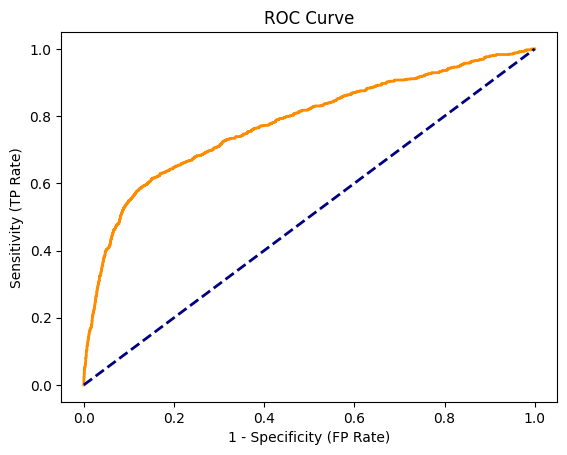

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1])

plt.plot(fpr, tpr, color="darkorange", lw=2)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlabel("1 - Specificity (FP Rate)")
plt.ylabel("Sensitivity (TP Rate)")
plt.title("ROC Curve")
plt.show()

### K-Fold Cross Validation for a Single Model

 You can change the scoring function by using the `scoring` parameter in `cross_val_score`.
* `accuracy`: Accuracy (**default**)
* `roc_auc`: Area under the receiver operating characteristic (ROC) curve
* `f1`: F1 score
* `precision`: Precision
* `recall`: Recall

In [ ]:
#model = LogisticRegression(solver="saga", max_iter=10000, penalty=None) # Logistic regression
# model = LogisticRegression(max_iter=10000, penalty="l1", C=1.0, solver="saga") # with L1 regularization
# model = LogisticRegression(max_iter=10000, penalty="l2", C=1.0, solver="saga") # with L2 regularization

# Polynomial regression
model = Pipeline([
     ("poly_features", PolynomialFeatures(degree=2)),
     ("softmax_reg", LogisticRegression(solver="saga", max_iter=10000, penalty=None))
 ])
random_state = 42
# Decision tree
# model = DecisionTreeClassifier(criterion="gini", max_depth=5, min_samples_split=2, min_impurity_decrease=0.0) # Decision tree
cv = StratifiedKFold(n_splits = 5, shuffle=True, random_state = random_state)
# kf = KFold(n_splits=5, shuffle=True, random_state=random_state)
scores = cross_val_score(model, X_train, y_train, cv=cv, scoring="f1")

print("Scores from each iteration:", scores)
print("Average score:", scores.mean())

### K-Fold Cross Validation using Grid Search

* Grid search over specified parameter values ([model_selection.GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html))

In [ ]:
from sklearn.model_selection import GridSearchCV

model = DecisionTreeClassifier(min_samples_split=2)

# Define the hyperparameters and their possible values
param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": [5, 10, 20, None],
    "min_impurity_decrease": [0.0, 0.05, 0.1],
}

grid_search = GridSearchCV(model, param_grid, cv=kf, scoring="f1")
grid_search.fit(X_samp, y_samp)

# Print the best parameters and the corresponding score
print("Best parameters: ", grid_search.best_params_)
print("Best CV score: {:.6f}".format(grid_search.best_score_))

Best parameters:  {'criterion': 'gini', 'max_depth': 20, 'min_impurity_decrease': 0.0}
Best CV score: 0.940779


## Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

model.fit(X_train, y_train)
#model.fit(X_samp, y_samp)

y_prob = model.predict_proba(X_test)
print("Estimated probs:", y_prob[:10])

y_cls = model.predict(X_test)
print("Estimated classes:", y_cls[:10])
print()

Estimated probs: [[0.96002586 0.03997414]
 [0.9576957  0.0423043 ]
 [0.92644733 0.07355267]
 [0.97298823 0.02701177]
 [0.97033414 0.02966586]
 [0.96963889 0.03036111]
 [0.96224497 0.03775503]
 [0.71011421 0.28988579]
 [0.93323375 0.06676625]
 [0.89844211 0.10155789]]
Estimated classes: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]



* Accuracy ([metrics.accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html))
* F1 ([metrics.f1_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html))
* ROC AUC ([metrics.roc_auc_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html))

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_cls))
print("F1:", f1_score(y_test, y_cls))
print("ROC AUC:", roc_auc_score(y_test, y_prob[:, 1]))

* Confusion Matrix ([metrics.confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html))

In [ ]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_cls)
conf_matrix_df = pd.DataFrame(
    conf_matrix,
    columns=["Predicted yes", "Predicted no"],
    index=["Actual yes", "Actual no"]
)
print(conf_matrix_df)

            Predicted yes  Predicted no
Actual yes           5253           101
Actual no             595           183


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, y_cls))

              precision    recall  f1-score   support

         0.0       0.90      0.98      0.94      5354
         1.0       0.64      0.24      0.34       778

    accuracy                           0.89      6132
   macro avg       0.77      0.61      0.64      6132
weighted avg       0.87      0.89      0.86      6132



* ROC Curve ([metrics.roc_curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html))

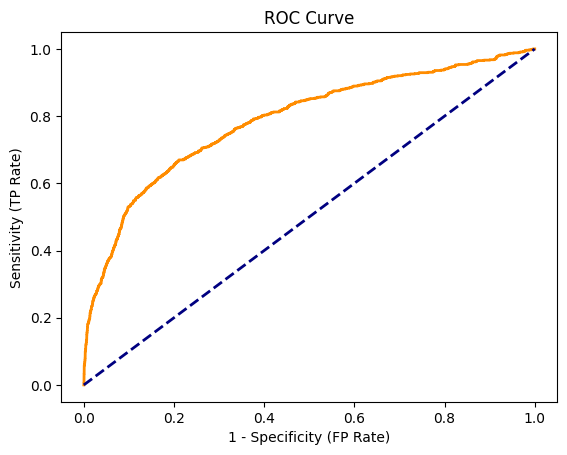

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1])

plt.plot(fpr, tpr, color="darkorange", lw=2)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlabel("1 - Specificity (FP Rate)")
plt.ylabel("Sensitivity (TP Rate)")
plt.title("ROC Curve")
plt.show()

## Interpretation

### Decision Tree
* Plot a decision tree ([tree.plot_tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html))

In [ ]:
feature_names = df.columns
target_names = ['Yes', 'No']

In [ ]:
from sklearn.tree import plot_tree

# Decision tree
model = DecisionTreeClassifier(criterion="entropy", max_depth=5, min_samples_split=2, min_impurity_decrease=0.0)
# model = DecisionTreeClassifier(max_depth=3, min_samples_split=2, min_impurity_decrease=0.0)
model.fit(X_train, y_train)

plt.figure(figsize=(20, 10))
plot_tree(model, filled=True, impurity=True, feature_names=feature_names, class_names=target_names, rounded=True)
plt.show()

#pycaret

In [ ]:
!pip install pycaret

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import chi2, SelectKBest, RFE
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from matplotlib import pylab
from pycaret.classification import *

In [ ]:
setup_clf = setup(data = df_train, target = 'y', train_size = 0.8,
                  session_id=777)

,Description,Value
0,Session id,777
1,Target,y
2,Target type,Binary
3,Target mapping,"no: 0, yes: 1"
4,Original data shape,"(30660, 20)"
5,Transformed data shape,"(30660, 49)"
6,Transformed train set shape,"(24528, 49)"
7,Transformed test set shape,"(6132, 49)"
8,Numeric features,10
9,Categorical features,9


In [ ]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [ ]:
model = compare_models(sort = 'F1', fold = 3, n_select = 5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8944,0.8034,0.8944,0.8768,0.8769,0.3544,0.3863,3.0967
rf,Random Forest Classifier,0.8921,0.7782,0.8921,0.8740,0.8755,0.3508,0.3782,3.8067
lda,Linear Discriminant Analysis,0.8855,0.7832,0.8855,0.8696,0.8745,0.3648,0.3760,0.8233
catboost,CatBoost Classifier,0.8919,0.8002,0.8919,0.8728,0.8736,0.3359,0.3677,11.9133
xgboost,Extreme Gradient Boosting,0.8892,0.7841,0.8892,0.8698,0.8729,0.3389,0.3628,1.0967
gbc,Gradient Boosting Classifier,0.8936,0.8029,0.8936,0.8751,0.8727,0.3246,0.3661,4.3533
knn,K Neighbors Classifier,0.8849,0.7365,0.8849,0.8660,0.8710,0.3376,0.3536,3.1067
ada,Ada Boost Classifier,0.8920,0.7962,0.8920,0.8723,0.8684,0.2960,0.3440,1.7700
et,Extra Trees Classifier,0.8812,0.7585,0.8812,0.8617,0.8676,0.3226,0.3362,3.8867
lr,Logistic Regression,0.8928,0.7834,0.8928,0.8743,0.8675,0.2870,0.3426,6.0367


Processing:   0%|          | 0/73 [00:00<?, ?it/s]